In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/toddhendricks/Downloads/SeoulBikeData.csv', encoding= 'unicode_escape', dtype= {},infer_datetime_format=True)

In [3]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) 

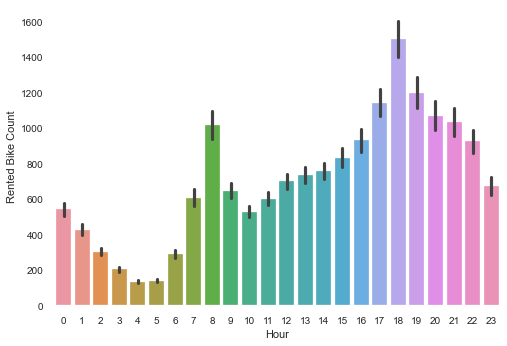

In [10]:
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])

In [20]:
corr = df.corr()

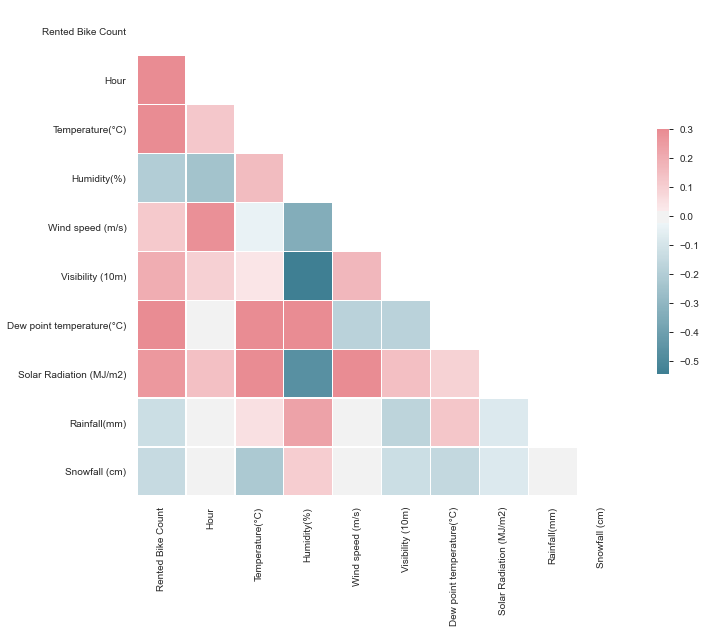

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


The correlations with rented bike count are what we would expect - namely, that the time of the day and the temperature seem to have the strongest relationship with when bikes get rented. Also, we would expect rain and snow to be negatively correlated. What is interesting, though, is that this the strength of the temperature and time relationships relative to the other features. The absolute measures (~.03) are not that high. 


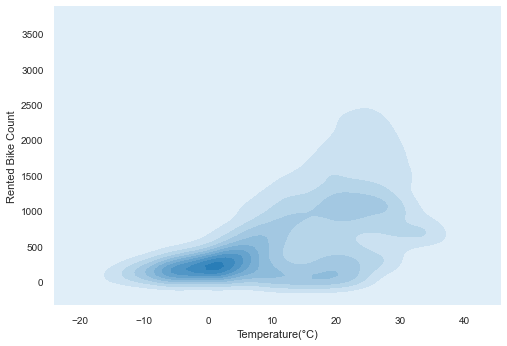

In [31]:
sns.kdeplot(data=df['Temperature(°C)'], data2=df['Rented Bike Count'], shade=True)

The KDE plot confirms intuition: most of the bikes are rented when the weather is nice (in the 70's and 80's Fahrenheit). Further, there is a predictable dropoff when it gets into the 90's, when a lot of people would consider it too hot.

In [33]:
df.to_pickle('./bikeshare.pkl')

In [14]:
df.nlargest(20, 'Rented Bike Count')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4818,2018-06-19,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4866,2018-06-21,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes
4650,2018-12-06,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4842,2018-06-20,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4458,2018-04-06,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes
4890,2018-06-22,3365,18,29.3,27,3.4,1977,8.3,1.24,0.0,0.0,Summer,No Holiday,Yes
4554,2018-08-06,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes
6810,2018-10-09,3298,18,25.9,42,1.1,2000,11.9,0.48,0.0,0.0,Autumn,No Holiday,Yes
6978,2018-09-17,3277,18,25.3,56,2.8,1992,15.8,0.54,0.0,0.0,Autumn,No Holiday,Yes
6858,2018-12-09,3256,18,27.0,44,1.4,2000,13.6,0.62,0.0,0.0,Autumn,No Holiday,Yes


In [15]:
df.nsmallest(20, 'Rented Bike Count')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No
3145,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No
3146,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No
3147,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No
3148,2018-11-04,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No
3149,2018-11-04,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No
3150,2018-11-04,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No
3151,2018-11-04,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No
3152,2018-11-04,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No
3153,2018-11-04,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No


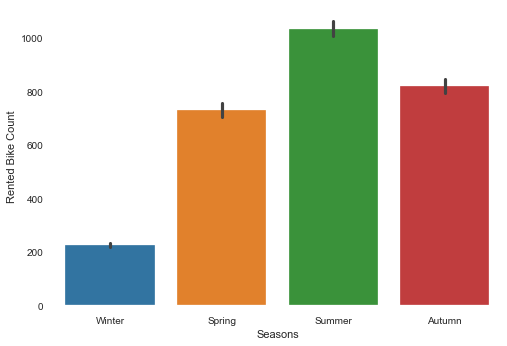

In [17]:
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])

In [24]:
df['ideal_temp'] = top_twenty['Temperature(°C)'].mean()

In [28]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'ideal_temp'],
      dtype='object')

In [31]:
df['dist_from_ideal_temp'] = (df['Temperature(°C)'] - df['ideal_temp']).abs()

In [33]:
df.nlargest(15, 'Rented Bike Count').sort_values(by=['dist_from_ideal_temp'])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,ideal_temp,dist_from_ideal_temp
4554,2018-08-06,3309,18,26.2,54,2.2,1183,16.1,0.88,0.0,0.0,Summer,No Holiday,Yes,26.215,0.015
4290,2018-05-28,3245,18,26.0,39,2.7,1950,10.9,1.07,0.0,0.0,Spring,No Holiday,Yes,26.215,0.215
6810,2018-10-09,3298,18,25.9,42,1.1,2000,11.9,0.48,0.0,0.0,Autumn,No Holiday,Yes,26.215,0.315
4842,2018-06-20,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes,26.215,0.785
6858,2018-12-09,3256,18,27.0,44,1.4,2000,13.6,0.62,0.0,0.0,Autumn,No Holiday,Yes,26.215,0.785
4482,2018-05-06,3227,18,27.1,40,2.8,1811,12.3,1.00,0.0,0.0,Summer,No Holiday,Yes,26.215,0.885
6978,2018-09-17,3277,18,25.3,56,2.8,1992,15.8,0.54,0.0,0.0,Autumn,No Holiday,Yes,26.215,0.915
4650,2018-12-06,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes,26.215,1.315
6834,2018-11-09,3222,18,24.7,45,0.7,2000,11.9,0.30,0.0,0.0,Autumn,No Holiday,Yes,26.215,1.515
4866,2018-06-21,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes,26.215,1.585


In [34]:
df.nsmallest(15, 'Rented Bike Count').sort_values(by=['dist_from_ideal_temp'])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,ideal_temp,dist_from_ideal_temp
3158,2018-11-04,0,14,16.4,28,3.4,1804,-2.1,3.16,0.0,0.0,Spring,No Holiday,No,26.215,9.815
3156,2018-11-04,0,12,15.7,46,3.9,1132,4.0,3.05,0.0,0.0,Spring,No Holiday,No,26.215,10.515
3157,2018-11-04,0,13,15.6,38,4.7,1558,1.3,3.32,0.0,0.0,Spring,No Holiday,No,26.215,10.615
3155,2018-11-04,0,11,14.9,44,4.0,1468,2.7,2.75,0.0,0.0,Spring,No Holiday,No,26.215,11.315
3144,2018-11-04,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No,26.215,11.815
3145,2018-11-04,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No,26.215,12.615
3154,2018-11-04,0,10,13.3,51,4.1,1487,3.3,2.17,0.0,0.0,Spring,No Holiday,No,26.215,12.915
3146,2018-11-04,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No,26.215,13.515
3153,2018-11-04,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No,26.215,14.415
3147,2018-11-04,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No,26.215,14.615


-0.5430622881997872

0       (-0.023, 5.75]
1       (-0.023, 5.75]
2       (-0.023, 5.75]
3       (-0.023, 5.75]
4       (-0.023, 5.75]
             ...      
8755     (17.25, 23.0]
8756     (17.25, 23.0]
8757     (17.25, 23.0]
8758     (17.25, 23.0]
8759     (17.25, 23.0]
Name: tod, Length: 8760, dtype: category
Categories (4, interval[float64]): [(-0.023, 5.75] < (5.75, 11.5] < (11.5, 17.25] < (17.25, 23.0]]